# SIT742: Modern Data Science 
**(2020 Assessment Task 02: Exploration FIFA2019 Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Group Information:** Please fill your information below

- Names with Student IDs: Rajeshkumar Mourya(218615876), Priyanka Naidu(219306186), Saikumar Chimakurthi (219380896) 
- Group ID: SIT742T2E Group 55 
- Emails: rmourya@deakin.edu.au, naidupr@deakin.edu.au, schimakurthi@deakin.edu.au  

---

## Overview

Recently, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) released one data set '[FIFA19](https://www.kaggle.com/karangadiya/fifa19)‘, which consists of 18K+ FIFA 19 player with around 90 attributes extracted from FIFA database. In this assessment task, we make it available as the data set:
- [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv): The data set for this assignment task.

In this task, you will need to **use Spark packages**

- **Part 1**: Exploratory Data Analysis

- **Part 2**: Clustering Analysis, and identify the position profiles of each cluster

- **Part 3**: Classification Analysis, and evaluate the performance of different algorithms using cross validation;


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own complete code to implement the required tasks. But you should provide sufficient comments.



## Part 1 - What we could know about FIFA 2019 Players? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***

Import the necessary Spark environment, and load the data set [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv).


In [0]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os,wget
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"


link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=32de98e0a7cd7bba795dbbbbf5785da993d1fb895699c5b8ae7519f30642065c
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)
!ls

2020T2Data.csv	spark-2.4.0-bin-hadoop2.7
sample_data	spark-2.4.0-bin-hadoop2.7.tgz


### 1.1 Data Exploration

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*

<a id="loading"></a>
***

<div class="alert alert-block alert-info">

**Code**: 
    import the csv file as a Spark dataframe and name it as df

</div>



In [0]:
# Import the '2020T2Data.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

# Your Code 
#Reading csv file as spark dataframe
df = spark.read.csv('2020T2Data.csv', header = True, inferSchema = True)
df.printSchema()


root
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- value(M): string (nullable = true)
 |-- wage(K): integer (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Preferred Foot: string (nullable = true)
 |-- International Reputation: integer (nullable = true)
 |-- Weak Foot: integer (nullable = true)
 |-- Skill Moves: integer (nullable = true)
 |-- Work Rate: string (nullable = true)
 |-- Body Type: string (nullable = true)
 |-- Real Face: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Jersey Number: integer (nullable = true)
 |-- Joined: string (nullable = true)
 |-- Loaned From: string (nullable = true)
 |-- Contract 

****


<div class="alert alert-block alert-info">

**Code**: 
    Check statistics (min, mean and max) for features on Age, Overall. Then find out the Avg Overall on Position, Avg Overall on Nationality (Sort by avg Overall on Nationality)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.A** Please answer questions with proper section title  '1.1.A':     
    <ol>
        <li> Which are the (min, mean and max) for Age </li>
        <li> Which are the (min, mean and max) for Overall </li>
        <li> Which position the talented player (based on Avg Overall) are playing? </li>
        <li> Which are the top 3 countres that most likely have the genies player (based on sort of Avg Overall) and </li>
    </ol>
</div>
</div>

In [0]:
from pyspark.sql import functions as F

#Your code for statistics on Age

from pyspark.sql.functions import min,max,mean

#Your code for statistics on Age

df.describe('Age').show()
df.select([mean('Age'), min('Age'), max('Age')]).show()



+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|             18207|
|   mean|25.122205745043114|
| stddev| 4.669942713414287|
|    min|                16|
|    max|                45|
+-------+------------------+

+------------------+--------+--------+
|          avg(Age)|min(Age)|max(Age)|
+------------------+--------+--------+
|25.122205745043114|      16|      45|
+------------------+--------+--------+



In [0]:
#Your Code for statistics on Overall
df.describe('Overall').show()
df.select([mean('Overall'), min('Overall'), max('Overall')]).show()


+-------+------------------+
|summary|           Overall|
+-------+------------------+
|  count|             18207|
|   mean| 66.23869940132916|
| stddev|6.9089296118831784|
|    min|                46|
|    max|                94|
+-------+------------------+

+-----------------+------------+------------+
|     avg(Overall)|min(Overall)|max(Overall)|
+-----------------+------------+------------+
|66.23869940132916|          46|          94|
+-----------------+------------+------------+



In [0]:
#Your Code for which position 

df.createOrReplaceTempView("df_table")
df11a3 = spark.sql("SELECT Position,AVG(Overall) FROM df_table GROUP BY Position ORDER BY AVG(Overall) DESC LIMIT 1")
df11a3.show()



+--------+-----------------+
|Position|     avg(Overall)|
+--------+-----------------+
|      LF|73.86666666666666|
+--------+-----------------+



In [0]:
#Your Code to output top 3 countries most likely having good players

df11a4 = spark.sql("SELECT Nationality,AVG(Overall) FROM df_table GROUP BY Nationality ORDER BY AVG(Overall) DESC LIMIT 3")
df11a4.show()

+--------------------+-----------------+
|         Nationality|     avg(Overall)|
+--------------------+-----------------+
|United Arab Emirates|             77.0|
|Central African Rep.|73.33333333333333|
|              Israel|72.14285714285714|
+--------------------+-----------------+



****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to find out the Avg Potentials on Country by Positions, and show the top 10 by ordering your results on Country with alphabet? (Hint: you may need to use pivot)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.B** Please answer questions with proper section title  '1.1.B':     
    <ol>
        <li> Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet</li>
        <li> Which position the young talented player (by Avg Potential) are playing in Australia? </li>
    </ol>
    
</div>
</div>

In [0]:
#Your code to identify top 10 countryes by alphabet
df_11b1 = df.groupby("Nationality").pivot("Position").mean('Potential').sort('Nationality').limit(10)
df_11b1.show()


#Your Code to identify which position has the most talend young players in Australia
Country = "Australia"
df_11b2 = spark.sql("SELECT Position,Nationality,AVG(Potential) FROM df_table WHERE Nationality= '{}' GROUP BY Position,Nationality ORDER BY AVG(Overall)  DESC LIMIT 1".format(Country))
df_11b2.show()



+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+
|      Nationality|null|              CAM|               CB|              CDM|  CF|               CM|               GK| LAM|               LB|              LCB|              LCM|              LDM|  LF|               LM|               LS|               LW|  LWB| RAM|               RB|              RCB|              RCM|              RDM|  RF|               RM|               RS|               RW| RWB|               ST|
+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+----------------

Interesting, is there a age that the player is fully relased his potential? If there is, could you find out?

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. (Hint: you may need to select and aggreate on data first and then turn it into pandas for plotting)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.C** Please include the following plot into your report with proper section title  '1.1.C':     
    <ol>
        <li> Plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. </li>
        <li> What you can find for the age at which the player is fully released his potential?
    </ol>
    
</div>
</div>

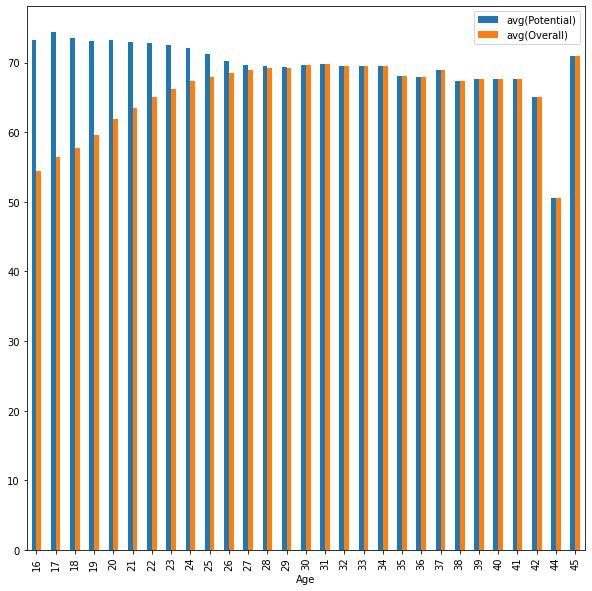

+---+-----------------+
|Age|   avg(Potential)|
+---+-----------------+
| 17|74.33910034602076|
+---+-----------------+



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Your Code for plot
df_pand = df.groupBy("Age").agg({'Potential':'avg', 'Overall':'avg'}).toPandas()
df_pand.sort_values(by="Age",inplace=True)

df_pand.plot(x="Age", y=["avg(Potential)","avg(Overall)"],kind="bar",figsize = (10,10))
plt.show()

#Find the age when the players are fully released their potential in general?
df11c2=spark.sql("SELECT Age,AVG(Potential) FROM df_table GROUP BY Age ORDER BY AVG(Potential) DESC LIMIT 1")
df11c2.show()





## Part 2 - Unsupervised Learning: Kmeans

<a id="kmeans"></a>
***

In this part, you are required to build a Kmeans clustering for explore the player segmentation. 


### 2.1 Data Preparation

*Remind: You must only use **pyspark** to complete the following data processing and model building. Otherwise, you lose all marks.*


****

<div class="alert alert-block alert-info">

**Code**: 
    You will need to remove the Goal Keepers (Position = 'GK') and only use the skillset attributes (Height(CM),
Weight(KG),
Crossing,
Finishing,
HeadingAccuracy,
ShortPassing,
Volleys,
Dribbling,
Curve,
FKAccuracy,
LongPassing,
BallControl,
Acceleration,
SprintSpeed,
Agility,
Reactions,
Balance,
ShotPower,
Jumping,
Stamina,
Strength,
LongShots,
Aggression,
Interceptions,
Positioning,
Vision,
Penalties,
Composure,
Marking,
StandingTackle,
SlidingTackle) 

</div>



In [0]:
# Your code to select relevent features and filtering by leaving out the GK
import pandas as pd
df2 = spark.read.csv('2020T2Data.csv', header = True, inferSchema = True)

df3 = df2[df2['Position']!='GK']      #dafaframe without goal keepers
df3.show(5)
#Selecting features
feature_col = ['Position', 'ID', 'Height(CM)', 'Weight(KG)', 'Crossing', 'Finishing', 'HeadingAccuracy', 
               'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 
               'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 
               'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 
               'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']
#setting up the dataframe with selected features
df3 = df3.select(feature_col)
df3.show(5)

+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+----------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|value(M)|wage(K)|Special|Preferred Foot|International Reputation|Weak Foot|Skill Moves|     Work Rate| Body 

To make the later stage easier, we define the position group by using the position feature.
- DEF = [LB,LWB,RB,LCB,RCB,CB,RWB] ,
- FWD = [RF,LF,LW,RS,RW,LS,CF,ST] ,
- MID = [LCM,LM,RDM,CAM,RAM,RCM,CM,CDM,RM,LAM,LDM]

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to create a new column called Position_Group with only DEF/FWD/MID in the dataframe you created in previous question

</div>

</div>

In [0]:
from pyspark.sql.functions import when,col

# Your code to complete
DEF = ['LB','LWB','RB','LCB','RCB','CB','RWB']
FWD=  ['RF','LF','LW','RS','RW','LS','CF','ST']
MID=  ['LCM','LM','RDM','CAM','RAM','RCM','CM','CDM','RM','LAM','LDM']

# Your code here to create a new variable df_kmeans_new with a new column Position_Group, ..
#

from pyspark.sql.functions import when,col
df_kmeans_new = df3.withColumn('Position_Group',
                when((col('Position').isin(DEF)), 'DEF')
                .when((col('Position').isin(FWD)), 'FWD')
                .when((col('Position').isin(MID)), 'MID'))

df_kmeans_new.show(5) #Position_Group added as last column

+--------+------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
|Position|    ID|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|
+--------+------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+---

Now, we remove the Position_Group and Position to create the feature for Kmeans




In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_ = vecAssembler.transform(df_kmeans_new).select('ID','features')
df_kmeans_.show(3)

+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.736,72.12112...|
| 20801|[188.976,83.00733...|
|190871|[179.832,68.0388,...|
+------+--------------------+
only showing top 3 rows



Now in order to evaluate your Kmeans Model, please plot the elbow plot


<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the elbow plot, with a varying K from 2 to 20.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1** In your report with proper section title  '2.1', Please include the elbow plot. 

</div>
</div>



In [0]:
cost = np.zeros(20)

for k in range(2,20):
  # Calculate cost for k in range (2,20)
   kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol('features')
   model = kmeans.fit(df_kmeans_)
   cost[k] = model.computeCost(df_kmeans_)



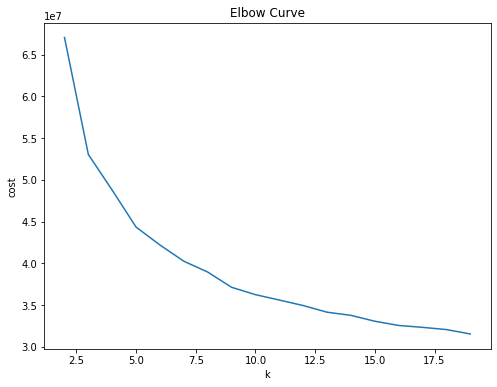

In [172]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.set_xlabel('k')
ax.set_ylabel('cost')

# Your Code

df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
df_cost.insert(0, 'cluster', new_col)

import pylab as pl
pl.plot(df_cost.cluster, df_cost.cost)
pl.title('Elbow Curve')
pl.show()


### 2.2 K-Means

Could you tell out the optimized K value? 




****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to choose a K value as 8 and then summarize each cluster with the count on Position_Group.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.2** In your report with proper section title  '2.2', Please summarize the following:     
    <ol>
        <li> What you could find from those clusters (by cluster central point)? </li>
        <li> Is there any Position_Group belonging to particular Cluster?</li>
    </ol>

</div>
</div>




In [0]:
k = 8

# Your code

kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol('features')
model = kmeans.fit(df_kmeans_)

centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

transformed = model.transform(df_kmeans_)
transformed.show() 

Cluster Centers: 
[177.3317464   76.31794486  58.41639945  44.02061383  62.79111315
  67.3220339   42.5387082   61.02611086  52.17911131  46.79294549
  63.5510765   65.5758131   65.25240495  66.06596427  64.62757673
  66.20568026  64.10581768  62.28263857  70.52038479  73.82638571
  72.67384333  52.59688502  71.43426477  67.65048099  53.27072836
  57.47457627  48.97938617  64.57627119  66.67155291  68.96472744
  66.88914338]
[187.68026262  81.70680941  39.8684377   30.21252372  68.72675522
  59.71600253  31.19354839  44.54332701  34.72485769  33.42631246
  54.99114485  55.46110057  53.19481341  55.6059456   50.15876028
  62.97975965  50.6116382   51.14231499  68.34977862  64.29095509
  79.52941176  34.24351676  70.56799494  67.06388362  33.600253
  41.73561037  41.05566097  61.12903226  67.29411765  69.6116382
  66.76533839]
[172.46617578  73.21508518  65.18944637  68.70069204  57.79541522
  69.00043253  64.56055363  73.22923875  67.01859862  61.3399654
  60.86245675  72.86548443  76.2

In [0]:
from pyspark.sql import SQLContext

# Your code

from pyspark.sql.functions import col

t = transformed.alias('t')
kmeans = df_kmeans_new.alias('kmeans')

df_kmeans_pred_ = kmeans.join(t, kmeans.ID == t.ID).select('*')
df_kmeans_pred_ = df_kmeans_pred_.withColumnRenamed("prediction", "Cluster")
df_kmeans_pred_.show()
for i in range(k):
  print ("Cluster ", i,"has:")
  df_kmeans_pred_.filter(df_kmeans_pred_.Cluster==i).groupby(df_kmeans_pred_.Position_Group).count().show()


+--------+------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+------+--------------------+-------+
|Position|    ID|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|    ID|            features|Cluster|
+--------+------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+---

## Part 3 - Supervised Learning: Classification on Position_Group

<a id="classification"></a>
***

In last part, you use the player's skillset values to segment the players into 8 clusters. Now we want to see whether we could accuratly predict the position_group of the player.

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*


### 3.1 Data Preparation

We remove the feature of position and use all other skillset features and the cluster prediction as the input for the model. Your target for classification is "Position_Group".

In [0]:
FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','Cluster']

df_kmeans_pred_=df_kmeans_pred_.drop('features')
vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
df_class_ = vecAssembler_.transform(df_kmeans_pred_).select('features','Position_Group')
df_class_.show(5)


+--------------------+--------------+
|            features|Position_Group|
+--------------------+--------------+
|[173.736,72.12112...|           FWD|
|[188.976,83.00733...|           FWD|
|[179.832,68.0388,...|           FWD|
|[155.7528,69.8531...|           MID|
|[176.784,73.93549...|           FWD|
+--------------------+--------------+
only showing top 5 rows



In many data science modeling work, feature scaling is very important.
In here, we use standard scaling on the fetaures.

In [0]:
from pyspark.ml.feature import StandardScaler

standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
raw_data=standardscaler.fit(df_class_).transform(df_class_)
raw_data.select("features","Scaled_features",'Position_Group').show(5)

+--------------------+--------------------+--------------+
|            features|     Scaled_features|Position_Group|
+--------------------+--------------------+--------------+
|[173.736,72.12112...|[12.9261363965246...|           FWD|
|[188.976,83.00733...|[14.0600080102548...|           FWD|
|[179.832,68.0388,...|[13.3796850420167...|           FWD|
|[155.7528,69.8531...|[11.5881678923229...|           MID|
|[176.784,73.93549...|[13.1529107192706...|           FWD|
+--------------------+--------------------+--------------+
only showing top 5 rows



In Spark, you could not use string as Target data type, Please encode the Position_Group column by using following encoding: 

FWD = 0
DEF = 1
MID = 2

*Hint: Data type after encoding should be numeric.*

In [0]:
raw_data_ = raw_data.withColumn('label',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))

### 3.2 Training Test Evaluation

We remove the feature of position and use all other skillset features and the cluster prediction as the input for the model. The target for classification is "Position_Group".

Now, we split your data into train/Test, and evaluate one model's performance.

In [0]:
train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)

In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="label", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train)

predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("label","prediction").show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|    2|       2.0|
|    2|       2.0|
|    0|       2.0|
|    2|       2.0|
|    2|       2.0|
|    2|       2.0|
|    2|       2.0|
|    1|       2.0|
|    0|       0.0|
|    2|       2.0|
+-----+----------+
only showing top 10 rows




****


<div class="alert alert-block alert-info">

**Code**: 
    You are required to evaluate the model by using confusion matrix. Please also print out your model's Precision, Recall and F1 score.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.2** In your report with proper section title  '3.2', Please summarize the following:     
    <ol>
        <li> The confusion matrix </li>
        <li> The Precision, Recall and F1 score</li>
    </ol>
</div>
</div>




In [0]:
from sklearn.metrics import confusion_matrix


# Your Code
y_true = [int(row.label) for row in predict_test.collect()]
y_pred = [int(row.prediction) for row in predict_test.collect()]

confusion_matrix(y_true, y_pred)

array([[ 834,    5,  178],
       [   2, 1422,  293],
       [ 225,  238, 1619]])

In [0]:
from sklearn.metrics import classification_report

# Your Code
target_names = ['FWD', 'DEF', 'MID']
print(classification_report(y_true, y_pred, target_names=target_names))



              precision    recall  f1-score   support

         FWD       0.87      0.74      0.80      1017
         DEF       0.86      0.90      0.88      1717
         MID       0.79      0.82      0.81      2082

    accuracy                           0.83      4816
   macro avg       0.84      0.82      0.83      4816
weighted avg       0.83      0.83      0.83      4816



### 3.3 K-fold Cross-Validation

We surely missed something during the modeling work -- Hyperparameter tuning! We can use K-fold cross validation to find out the best hyperparameter set.

****


<div class="alert alert-block alert-info">

**Code**: 
    Please implement K-fold cross validation for three (any three) classification models.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.3** In your report with proper section title  '3.3', Please summarize the following:     
    <ol>
        <li> Your code design and running results </li>
        <li> Your findings on hyperparameters based on this cross-validation results</li>
        <li> Any difficuties you had </li>
        <li> Any other possible tasks we could do on this dataset </li>
    </ol>
<b>Remind: fail to list the reference will lead a penalty and possibly plagiarism</b>    
</div>
</div>



In [170]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Random forest classification model 

#Train a random forest model
rf = RandomForestClassifier(labelCol='label', featuresCol='Scaled_features', numTrees=10)

#Chain forest in Pipeline
pipeline = Pipeline(stages=[rf])

#Set parameters for cross validation
paramGrid = ParamGridBuilder(). addGrid(rf.numTrees,[10,20,30,40,50]) .build()

#Cross Validator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=5)

#Fit training data to the best hyper parameters identified by validator
cvModel = crossval.fit(train)

print("**Best model is:\n",cvModel.bestModel.stages[0]) #Best case for numtrees in rf

prediction = cvModel.bestModel.transform(test)
selected = prediction.select("label", "prediction")

#Evaluate accuracy of model
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
RFM_accurary = evaluator.evaluate(prediction)
print("\nRandom forest Model accuracy:", RFM_accurary)

print("\n**Classification report for Random forest model**\n")

y_true = [int(row.label) for row in prediction.collect()]
y_pred = [int(row.prediction) for row in prediction.collect()]

print(classification_report(y_true, y_pred, target_names=target_names))

**Best model is:
 RandomForestClassificationModel (uid=RandomForestClassifier_559b62593514) with 20 trees

Random forest Model accuracy: 0.8306779495418989

**Classification report for Random forest model**

              precision    recall  f1-score   support

         FWD       0.87      0.74      0.80      1017
         DEF       0.86      0.90      0.88      1717
         MID       0.79      0.82      0.81      2082

    accuracy                           0.83      4816
   macro avg       0.84      0.82      0.83      4816
weighted avg       0.83      0.83      0.83      4816



In [168]:
#Decision Tree classification Model

from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol="label", featuresCol="Scaled_features")
pipeline = Pipeline(stages=[dt])

paramGrid = ParamGridBuilder(). addGrid(dt.maxDepth, [2,5]) .build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(),
                          numFolds=5)

cvModel = crossval.fit(train)

print("**Best model is:\n", cvModel.bestModel.stages[0]) #Best case for depth in dt

prediction = cvModel.bestModel.transform(test)
selected = prediction.select("label", "prediction")

evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
DT_accurary = evaluator.evaluate(prediction)
print("\nDecision tree Model accurary:", DT_accurary)


print("\n**Classification report for Decision tree model**\n")
y_true = [int(row.label) for row in prediction.collect()]
y_pred = [int(row.prediction) for row in prediction.collect()]

print(classification_report(y_true, y_pred, target_names=target_names))

**Best model is:
 DecisionTreeClassificationModel (uid=DecisionTreeClassifier_6d1adc3ea104) of depth 5 with 47 nodes

Decision tree Model accurary: 0.811376127079013

**Classification report for Decision tree model**

              precision    recall  f1-score   support

         FWD       0.81      0.73      0.77      1017
         DEF       0.85      0.88      0.87      1717
         MID       0.78      0.79      0.79      2082

    accuracy                           0.81      4816
   macro avg       0.81      0.80      0.81      4816
weighted avg       0.81      0.81      0.81      4816



In [0]:
#Logistic regression model
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

lr = LogisticRegression(labelCol ='label', featuresCol = 'Scaled_features',maxIter=10)
pipeline = Pipeline(stages=[lr])

paramGrid = ParamGridBuilder().build()

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=5)
model = crossval.fit(train)

In [167]:

print("**Best model is:\n",model.bestModel.stages[0]) #Best model 


prediction = model.bestModel.transform(test)
selected = prediction.select("label", "prediction")

evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
LR_accurary = evaluator.evaluate(prediction)
print("\nLogistic Regression Model accurary is:", LR_accurary)

print("\n**Classification report for Logistic regression model**\n")
y_true = [int(row.label) for row in prediction.collect()]
y_pred = [int(row.prediction) for row in prediction.collect()]

print(classification_report(y_true, y_pred, target_names=target_names))


**Best model is:
 LogisticRegressionModel: uid = LogisticRegression_229f166b22ed, numClasses = 3, numFeatures = 32

Logistic Regression Model accurary is: 0.804838079692376

**Classification report for Logistic regression model**

              precision    recall  f1-score   support

         FWD       0.79      0.82      0.80      1017
         DEF       0.85      0.83      0.84      1717
         MID       0.77      0.78      0.78      2082

    accuracy                           0.80      4816
   macro avg       0.80      0.81      0.81      4816
weighted avg       0.81      0.80      0.80      4816

